In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Set random seed for reproducibility
np.random.seed(42)
data = pd.read_csv("Dataset/covtype.data.gz", compression='gzip', header=None)

# Define column names based on dataset description
columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
] + [f'Wilderness_Area_{i}' for i in range(1, 5)] + \
    [f'Soil_Type_{i}' for i in range(1, 41)] + ['Cover_Type']

data.columns = columns
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

In [5]:
data.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [6]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']

y_zero_based = y - 1

X_train, X_test, y_train, y_test = train_test_split(X, y_zero_based, test_size=0.2, random_state=42)

In [7]:
numerical_features = columns[:10]
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [8]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
xgb_model = xgb.XGBClassifier(random_state=42, objective='multi:softmax', num_class=7, n_jobs=-1)

In [9]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [10]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_class=7, ...)

In [11]:
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

In [12]:
rf_train_pred_original = rf_train_pred + 1
rf_test_pred_original = rf_test_pred + 1
xgb_train_pred_original = xgb_train_pred + 1
xgb_test_pred_original = xgb_test_pred + 1
y_train_original = y_train + 1
y_test_original = y_test + 1

In [13]:
print("Random Forest Training Accuracy:", accuracy_score(y_train_original, rf_train_pred_original))
print("Random Forest Test Accuracy:", accuracy_score(y_test_original, rf_test_pred_original))
print("\nRandom Forest Classification Report (Test Set):")
print(classification_report(y_test_original, rf_test_pred_original))

Random Forest Training Accuracy: 0.9999978485786635
Random Forest Test Accuracy: 0.9551388518368716

Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.94      0.90      0.92      3489
           7       0.97      0.96      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



In [14]:
print("\nXGBoost Training Accuracy:", accuracy_score(y_train_original, xgb_train_pred_original))
print("XGBoost Test Accuracy:", accuracy_score(y_test_original, xgb_test_pred_original))
print("\nXGBoost Classification Report (Test Set):")
print(classification_report(y_test_original, xgb_test_pred_original))


XGBoost Training Accuracy: 0.8789696412935205
XGBoost Test Accuracy: 0.8711823274786366

XGBoost Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.86      0.84      0.85     42557
           2       0.87      0.90      0.88     56500
           3       0.90      0.91      0.91      7121
           4       0.91      0.86      0.89       526
           5       0.89      0.59      0.71      1995
           6       0.85      0.82      0.83      3489
           7       0.94      0.92      0.93      4015

    accuracy                           0.87    116203
   macro avg       0.89      0.83      0.86    116203
weighted avg       0.87      0.87      0.87    116203



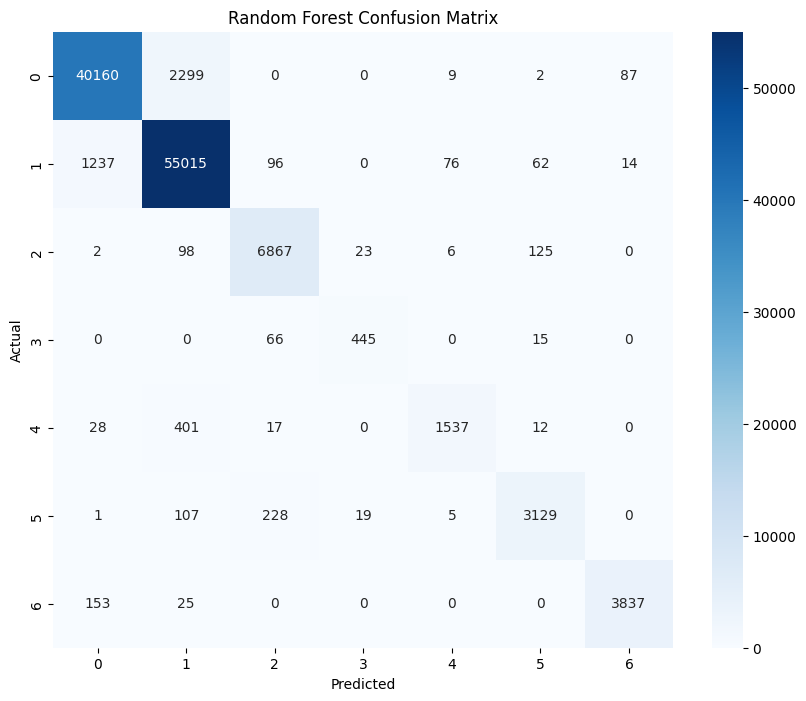

In [15]:
cm_rf = confusion_matrix(y_test_original, rf_test_pred_original)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('rf_confusion_matrix.png')
plt.show()

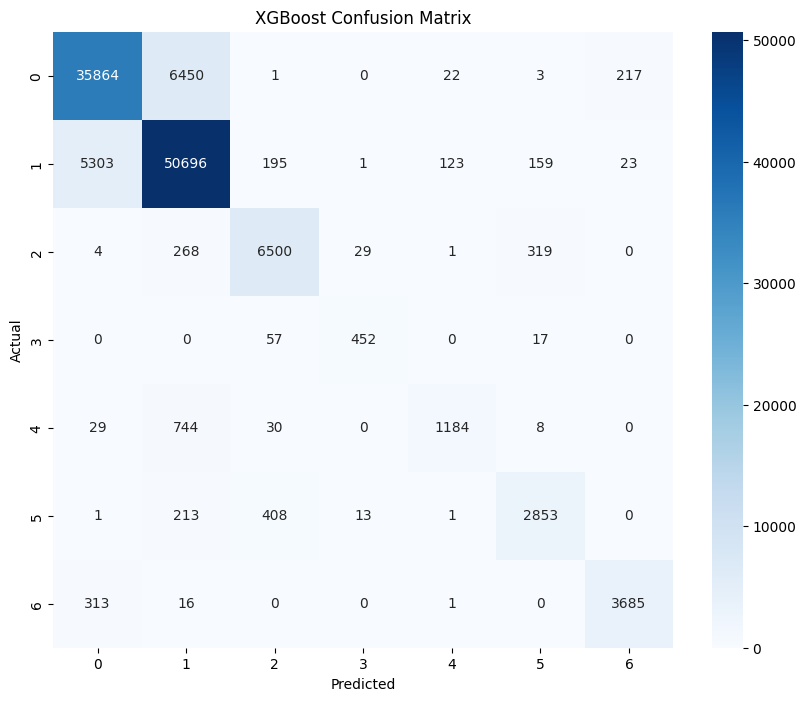

In [16]:
cm_xgb = confusion_matrix(y_test_original, xgb_test_pred_original)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('xgb_confusion_matrix.png')
plt.show()

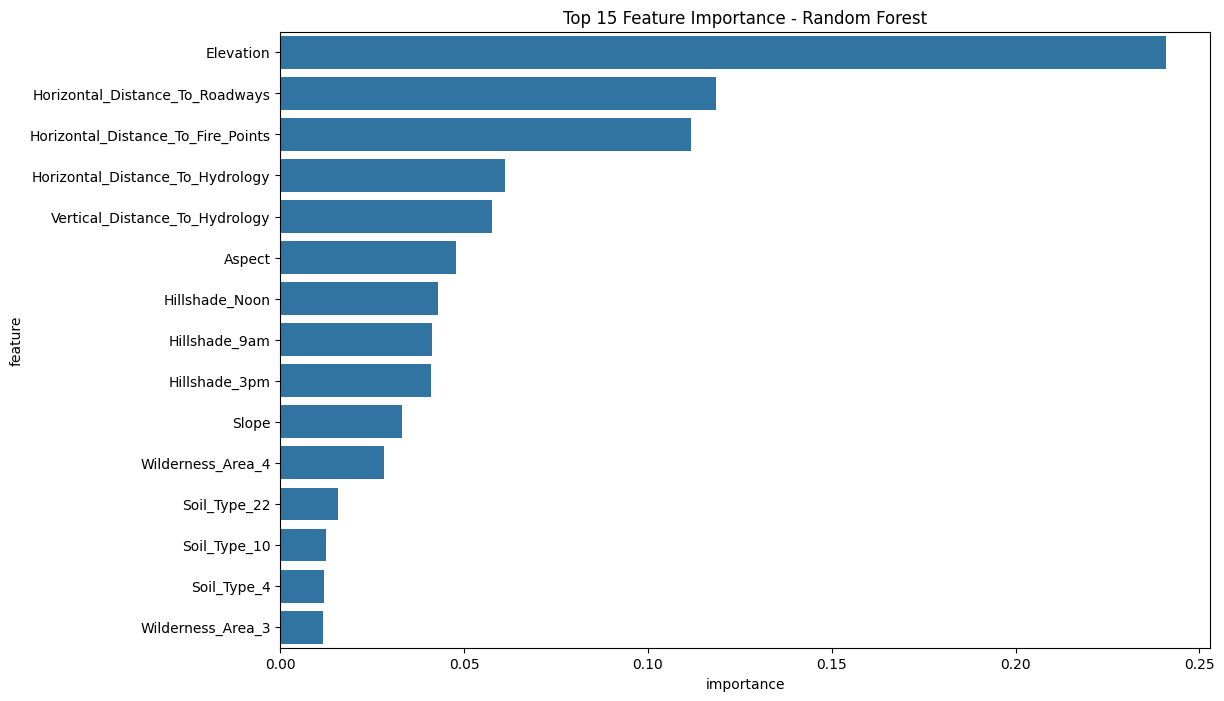

In [17]:
rf_feature_importance = rf_model.feature_importances_
rf_feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_feature_importance
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=rf_feature_importance_df.head(15))
plt.title('Top 15 Feature Importance - Random Forest')
plt.savefig('rf_feature_importance.png')
plt.show()

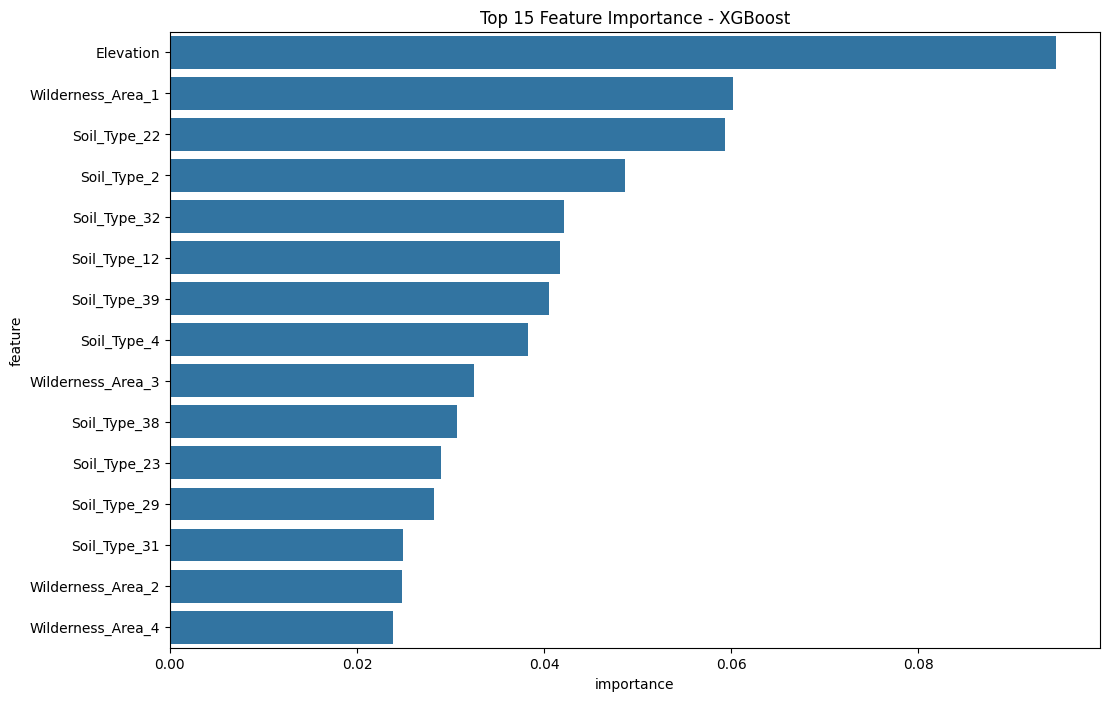

In [18]:
xgb_feature_importance = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_feature_importance
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=xgb_feature_importance_df.head(15))
plt.title('Top 15 Feature Importance - XGBoost')
plt.savefig('xgb_feature_importance.png')
plt.show()

In [19]:
print("=== Model Comparison ===")
print("\nRandom Forest Training Accuracy:", accuracy_score(y_train_original, rf_train_pred_original))
print("Random Forest Test Accuracy:", accuracy_score(y_test_original, rf_test_pred_original))
print("\nRandom Forest Classification Report (Test Set):")
print(classification_report(y_test_original, rf_test_pred_original))

print("\nXGBoost Training Accuracy:", accuracy_score(y_train_original, xgb_train_pred_original))
print("XGBoost Test Accuracy:", accuracy_score(y_test_original, xgb_test_pred_original))
print("\nXGBoost Classification Report (Test Set):")
print(classification_report(y_test_original, xgb_test_pred_original))

=== Model Comparison ===

Random Forest Training Accuracy: 0.9999978485786635
Random Forest Test Accuracy: 0.9551388518368716

Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.94      0.90      0.92      3489
           7       0.97      0.96      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203


XGBoost Training Accuracy: 0.8789696412935205
XGBoost Test Accuracy: 0.8711823274786366

XGBoost Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.86      0.84      0.